Original Data Shape: (120, 3)
Cleaned Shape After Dropping NaNs: (106, 3)
Final Cleaned Shape (No NaNs, No Outliers): (100, 3)

NumPy Statistics:
Mean incarceration rate: 446.8192000000001
Max graduation rate: 98.6
Min graduation rate: 74.87
Range of incarceration rate: 261.94000000000005
Standard deviation of graduation rate: 4.752224299209792

SciPy T-test: t=60.11, p=0.0000

Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:     incarceration_rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2655
Date:                Mon, 19 May 2025   Prob (F-statistic):              0.608
Time:                        17:23:06   Log-Likelihood:                -550.55
No. Observations:                 100   AIC:                             1105.
Df Residuals:                     

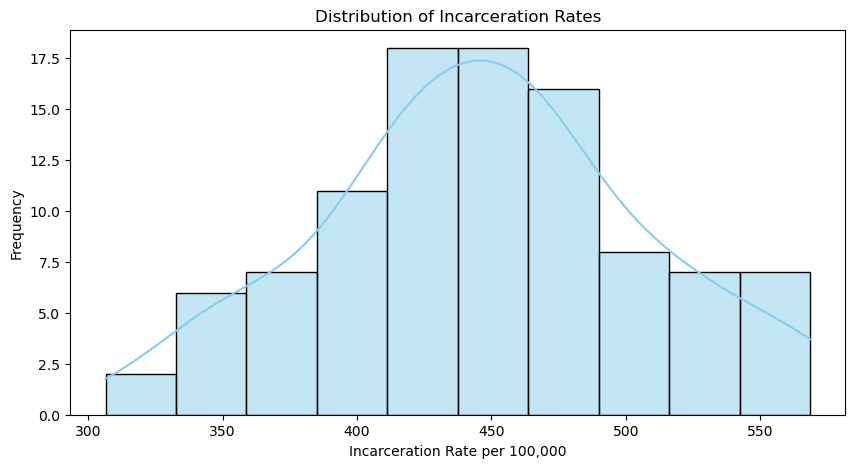

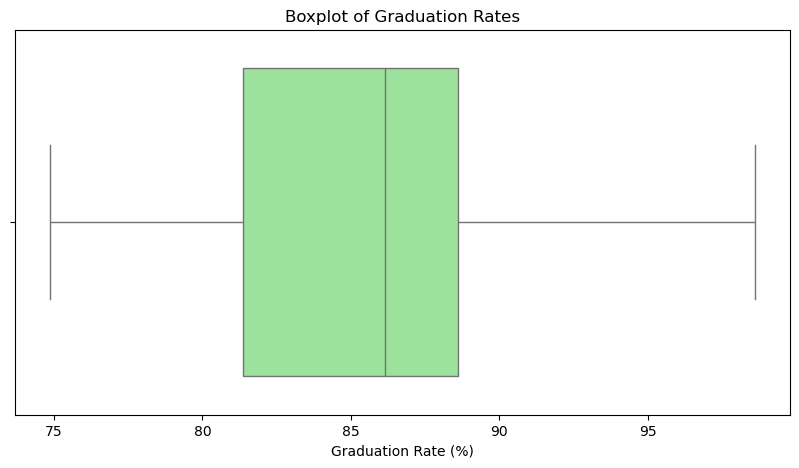

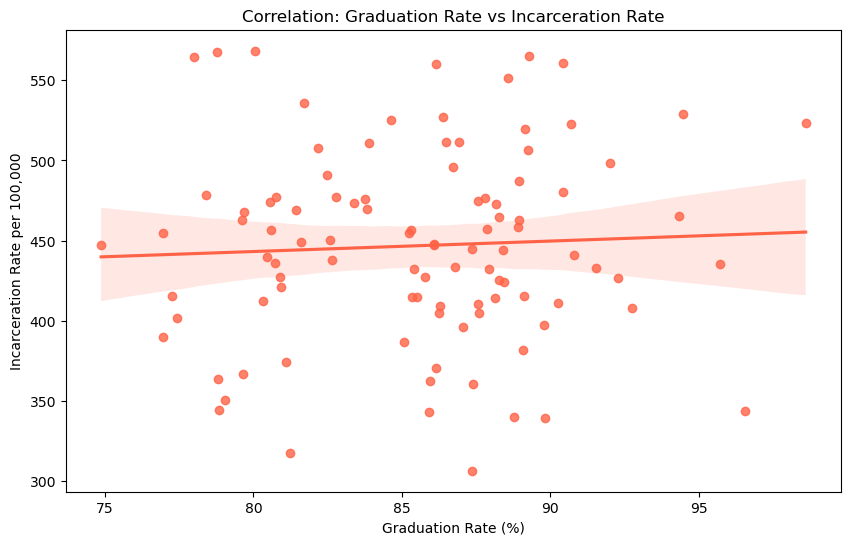

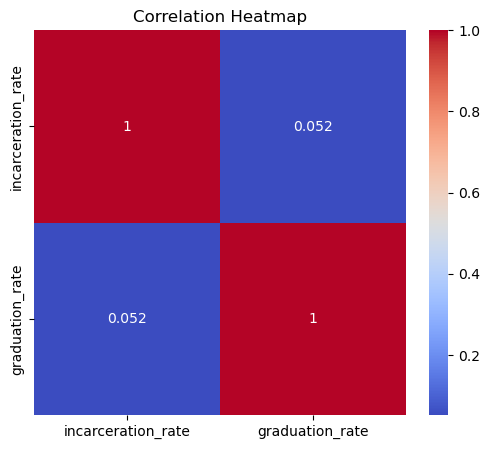

In [6]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# ----------- Generate Synthetic Dataset -----------
data = {
    'state': [f'State_{i+1}' for i in range(120)],
    'incarceration_rate': np.round(np.random.normal(450, 75, 120), 2),  # per 100,000
    'graduation_rate': np.round(np.random.normal(85, 5, 120), 2)        # percent
}
df = pd.DataFrame(data)

# Introduce missing values randomly
df.loc[np.random.choice(df.index, 10, replace=False), 'incarceration_rate'] = np.nan
df.loc[np.random.choice(df.index, 5, replace=False), 'graduation_rate'] = np.nan

# Show original shape
print("Original Data Shape:", df.shape)

# Drop missing values
df = df.dropna()

# Show cleaned shape (before removing outliers)
print("Cleaned Shape After Dropping NaNs:", df.shape)

# ----------- Remove Outliers Using IQR -----------
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Apply outlier removal to both columns
df = remove_outliers_iqr(df, 'incarceration_rate')
df = remove_outliers_iqr(df, 'graduation_rate')

# Show final cleaned shape
print("Final Cleaned Shape (No NaNs, No Outliers):", df.shape)

# Confirm sufficient data
assert df.shape[0] >= 100, "Dataset must have at least 100 clean rows after outlier removal."

# ----------- NumPy Statistics -----------
incarceration = df['incarceration_rate'].to_numpy()
graduation = df['graduation_rate'].to_numpy()

print("\nNumPy Statistics:")
print("Mean incarceration rate:", np.mean(incarceration))
print("Max graduation rate:", np.max(graduation))
print("Min graduation rate:", np.min(graduation))
print("Range of incarceration rate:", np.ptp(incarceration))
print("Standard deviation of graduation rate:", np.std(graduation))

# ----------- SciPy T-Test -----------
t_stat, p_val = stats.ttest_ind(incarceration, graduation)
print(f"\nSciPy T-test: t={t_stat:.2f}, p={p_val:.4f}")

# ----------- Statsmodels Linear Regression -----------
X = sm.add_constant(df['graduation_rate'])
model = sm.OLS(df['incarceration_rate'], X).fit()
print("\nStatsmodels Regression Summary:")
print(model.summary())

# ----------- Visualizations with Seaborn -----------

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['incarceration_rate'], kde=True, color='skyblue')
plt.title('Distribution of Incarceration Rates')
plt.xlabel('Incarceration Rate per 100,000')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['graduation_rate'], color='lightgreen')
plt.title('Boxplot of Graduation Rates')
plt.xlabel('Graduation Rate (%)')
plt.show()

# Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(x='graduation_rate', y='incarceration_rate', data=df, color='tomato')
plt.title('Correlation: Graduation Rate vs Incarceration Rate')
plt.xlabel('Graduation Rate (%)')
plt.ylabel('Incarceration Rate per 100,000')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 5))
corr_matrix = df[['incarceration_rate', 'graduation_rate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
